<span style="color:#04c921; font-size:24px; font-weight:700"> Linear Regression</span>

In this practice, we will use linear regression to do some analysis with the framingham data set to see if we can find any meaningful relationships between blood pressure, age, and gender.

The numeric difference between your systolic and diastolic blood pressure is called your pulse pressure. For example, if your resting blood pressure is 120/80, your pulse pressure is 40. For adults older than age 60, a pulse pressure greater than 60 can be a useful predictor of heart attacks or other cardiovascular disease; this is especially true for men. The most important cause of elevated pulse pressure is stiffness of the aorta, the largest artery in the body. The greater your pulse pressure, the stiffer and more damaged the vessels are thought to be.
([Reference](http://www.mayoclinic.org/diseases-conditions/high-blood-pressure/expert-answers/pulse-pressure/faq-20058189))

#### Read the data

Load the framingham dataset in directory '/datasets/framingham/'.

In [1]:
framingham_data <- read.csv("/dsa/data/all_datasets/framingham/framingham.csv")

Let's add a new column for the pulse pressure named "pulseP" and compute it from sysBP and diaBP.

In [2]:
framingham_data["pulseP"] <- framingham_data$sysBP - framingham_data$diaBP
head(framingham_data)

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,pulseP
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0,36.0
0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0,40.0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0,47.5
0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1,55.0
0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0,46.0
0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0,70.0


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 1:</span> For this analysis, we'll need adults (age>18) who are not taking blood pressure medication (BPMeds==0), and we will create two subsets; one for males and one for females, and pick only the columns we'll work on (age, sysBP, diaBP, BMI, heartRate, pulseP).

In [4]:
framingham_data_male   <- subset(framingham_data, framingham_data$male == 1, select=c(2,11:14,17))
framingham_data_female <- subset(framingham_data, framingham_data$male == 0, select=c(2,11:14,17))
head(framingham_data_male)

,age,sysBP,diaBP,BMI,heartRate,pulseP
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,39,106.0,70,26.97,80,36.0
3,48,127.5,80,25.34,75,47.5
9,52,141.5,89,26.36,76,52.5
10,43,162.0,107,23.61,93,55.0
13,46,142.0,94,26.31,98,48.0
17,48,138.0,90,22.37,64,48.0


Now, let's see if we can model the relation between age and pulse pressure for males vs. females.

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 2:</span>   Fit a linear regression model where age is the independent variable, and pulse pressure is the dependent variable. 

In [6]:
# find the model for males
age_pp_male <- lm(framingham_data_male$pulseP ~ framingham_data_male$age)
summary(age_pp_male)

# find the model for females
age_pp_female <- lm(framingham_data_female$pulseP ~ framingham_data_female$age)
summary(age_pp_female)


Call:
lm(formula = framingham_data_male$pulseP ~ framingham_data_male$age)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.999  -8.154  -1.159   5.789  79.562 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              23.60726    1.67707   14.08   <2e-16 ***
framingham_data_male$age  0.48970    0.03352   14.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.2 on 1818 degrees of freedom
Multiple R-squared:  0.105,	Adjusted R-squared:  0.1045 
F-statistic: 213.4 on 1 and 1818 DF,  p-value: < 2.2e-16



Call:
lm(formula = framingham_data_female$pulseP ~ framingham_data_female$age)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.461  -9.054  -1.345   6.397  96.539 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 6.15930    1.64815   3.737  0.00019 ***
framingham_data_female$age  0.89534    0.03262  27.451  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.79 on 2418 degrees of freedom
Multiple R-squared:  0.2376,	Adjusted R-squared:  0.2373 
F-statistic: 753.6 on 1 and 2418 DF,  p-value: < 2.2e-16


The $R^2$ values are 0.10 and 0.22 which suggests age alone is not a good predictor of pulse pressure in neither males nor females. Look out for the caveats here: first, we are trying to fit a **linear** model; the actual relationship could be a nonlinear one; and second, there might be different types of relationships in separated age brackets (such as before 50, after 50, etc.) that is hard to model with one linear model. 

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 3:</span>  Let's do the same for BMI and pulse pressure variables.  Fit a linear regression model where BMI is independent and pulse pressure is the dependent variable. 

In [7]:
# find the model for males
bmi_pp_male <- lm(framingham_data_male$pulseP ~ framingham_data_male$BMI)
summary(bmi_pp_male)

# find the model for females
bmi_pp_female <- lm(framingham_data_female$pulseP ~ framingham_data_female$BMI)
summary(bmi_pp_female)


Call:
lm(formula = framingham_data_male$pulseP ~ framingham_data_male$BMI)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.937  -8.601  -1.942   6.020  72.365 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               41.8126     2.3053  18.137  < 2e-16 ***
framingham_data_male$BMI   0.2252     0.0873   2.579  0.00998 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.7 on 1813 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.003656,	Adjusted R-squared:  0.003106 
F-statistic: 6.652 on 1 and 1813 DF,  p-value: 0.009982



Call:
lm(formula = framingham_data_female$pulseP ~ framingham_data_female$BMI)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.166  -9.935  -2.819   6.710  97.326 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                27.82474    1.79318   15.52   <2e-16 ***
framingham_data_female$BMI  0.89772    0.06923   12.97   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.26 on 2404 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.06538,	Adjusted R-squared:  0.06499 
F-statistic: 168.2 on 1 and 2404 DF,  p-value: < 2.2e-16


Again, $R^2$ values are too low to suggest a good model based on BMI.

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 4:</span>  Let's create two subsets from male data; first one is for those younger than 50, second one is for those older than 50. We want to see if the relation between heart rate and pulse pressure is different for older males vs. younger males.


In [10]:
framingham_data_male_younger <- subset(framingham_data_male, framingham_data_male$age < 50)
framingham_data_male_older   <- subset(framingham_data_male, framingham_data_male$age >= 50)

# now fit a linear model to both data sets; use pulse pressure as independent variable and find the model for heart rate.
hr_pp_male_young <- lm(framingham_data_male_younger$heartRate ~ framingham_data_male_younger$pulseP)
summary(hr_pp_male_young)

hr_pp_male_older <- lm(framingham_data_male_older$heartRate ~ framingham_data_male_older$pulseP)
summary(hr_pp_male_older)


Call:
lm(formula = framingham_data_male_younger$heartRate ~ framingham_data_male_younger$pulseP)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.541  -7.754  -0.735   6.866  43.120 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         65.81409    1.63908  40.153  < 2e-16 ***
framingham_data_male_younger$pulseP  0.19834    0.03589   5.527 4.19e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.47 on 972 degrees of freedom
Multiple R-squared:  0.03047,	Adjusted R-squared:  0.02947 
F-statistic: 30.54 on 1 and 972 DF,  p-value: 4.195e-08



Call:
lm(formula = framingham_data_male_older$heartRate ~ framingham_data_male_older$pulseP)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.013  -8.492  -1.114   6.976  45.911 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       68.34091    1.49603   45.68  < 2e-16 ***
framingham_data_male_older$pulseP  0.10644    0.02801    3.80 0.000155 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.75 on 843 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01684,	Adjusted R-squared:  0.01567 
F-statistic: 14.44 on 1 and 843 DF,  p-value: 0.0001551


Again, we do not see a meaningful linear model for heart rate given pulse pressure for young and old people. Let's look at the relationship between systolic and diastolic blood pressures. 

The dynamic relationship between diastolic and systolic blood pressure expressed by the **ambulatory arterial stiffness index (AASI)** has been introduced as a measure of arterial function.
[AASI = 1 - (regression slope of diastolic-versus-systolic)] 
The available evidence suggests that AASI can predict future cardiovascular events, particularly stroke, and is associated with indices of arterial function. ([Reference](https://www.ncbi.nlm.nih.gov/pubmed/22632918))

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 5:</span>  Now, we want to compute the AASI for males older than 50 vs. females older than 50. For this, we first create the female subset, then compute the slopes of diastolic vs. systolic linear regression model for both sets, and finally compute the AASI for both sets. 

In [9]:
framingham_data_female_older <- subset(framingham_data_female, age >= 50)
# Now compute the linear models for framingham_data_female_older and framingham_data_male_older; 
# Use systolic pressure as independent variable

In [12]:
# find the model for older males
slope_male_older <- lm(framingham_data_male_older$diaBP ~ framingham_data_male_older$sysBP)
summary(slope_male_older)

# find the model for older females
slope_female_older <- lm(framingham_data_female_older$diaBP ~ framingham_data_female_older$sysBP)
summary(slope_female_older)


Call:
lm(formula = framingham_data_male_older$diaBP ~ framingham_data_male_older$sysBP)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.3215  -4.2816   0.4249   4.8377  28.3545 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      24.33763    1.64992   14.75   <2e-16 ***
framingham_data_male_older$sysBP  0.44190    0.01199   36.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.693 on 844 degrees of freedom
Multiple R-squared:  0.6168,	Adjusted R-squared:  0.6164 
F-statistic:  1359 on 1 and 844 DF,  p-value: < 2.2e-16



Call:
lm(formula = framingham_data_female_older$diaBP ~ framingham_data_female_older$sysBP)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.946  -4.616   0.314   5.071  32.367 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        30.872871   1.367675   22.57   <2e-16 ***
framingham_data_female_older$sysBP  0.383801   0.009406   40.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.03 on 1175 degrees of freedom
Multiple R-squared:  0.5862,	Adjusted R-squared:  0.5859 
F-statistic:  1665 on 1 and 1175 DF,  p-value: < 2.2e-16


The $R^2$ values suggest that there is a somewhat linear relationship between systolic and diastolic blood pressures for both genders. Let's look at the coefficients of the models.

In [13]:
# First column gives the intercept and the slope of the model.

coef(summary(slope_male_older))
slope_mo <- coef(summary(slope_male_older))[2,1]

coef(summary(slope_female_older))
slope_fo <- coef(summary(slope_female_older))[2,1]


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),24.33763,1.64991665,14.75082,5.547727e-44
framingham_data_male_older$sysBP,0.44190,0.01198896,36.85890,5.529823e-178


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),30.8728707,1.367675116,22.57325,5.168270e-94
framingham_data_female_older$sysBP,0.3838007,0.009406365,40.80223,2.095235e-227


In [14]:
# Now, given slopes for both models, compute the corresponding AASI values

AASI_male_older = 1 - slope_mo
AASI_female_older = 1 - slope_fo

In [15]:
print(AASI_male_older)
print(AASI_female_older)

[1] 0.5581
[1] 0.6161993


The AASI for older females is slightly higher than the AASI for older males in this data set. Keep in mind that this is an approximation; the real AASI is measured for individuals by observing their blood pressure in a 24h interval. However, the almost linear relationship between systolic and diastolic blood pressure is indeed medically relevant; it is not just a fluke of this dataset. 

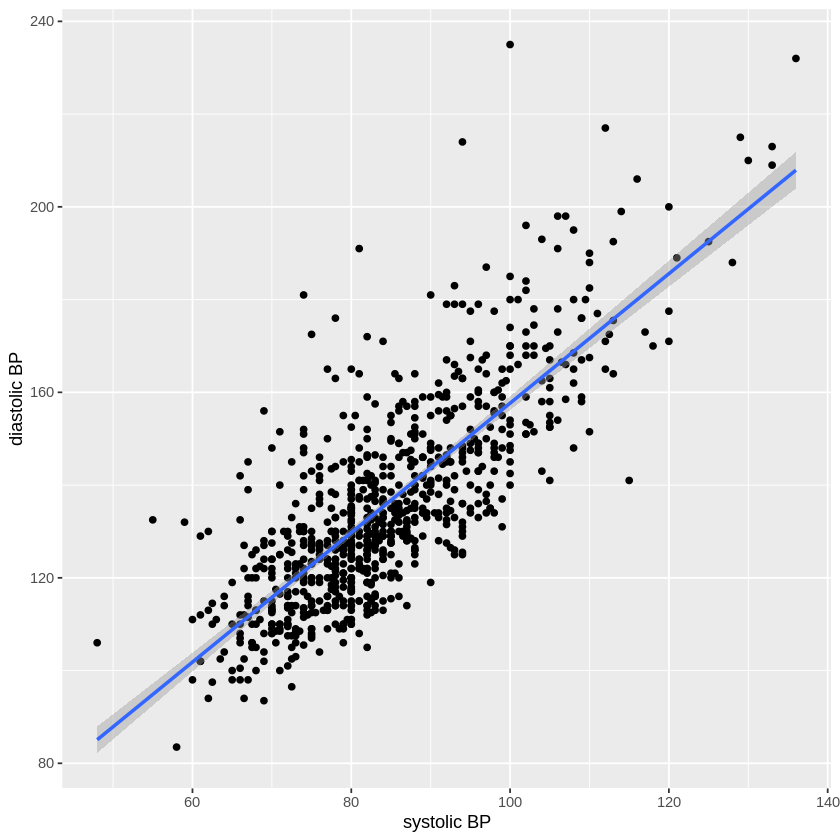

In [16]:
# Let's plot the model for males
library(ggplot2)
p = ggplot(framingham_data_male_older, aes(x=sysBP, y=diaBP)) +
    geom_point() +  
    geom_smooth(method=lm,level = 0.95)   # Add linear regression line, by default includes 95% confidence region
p+xlab('systolic BP')+ylab('diastolic BP')

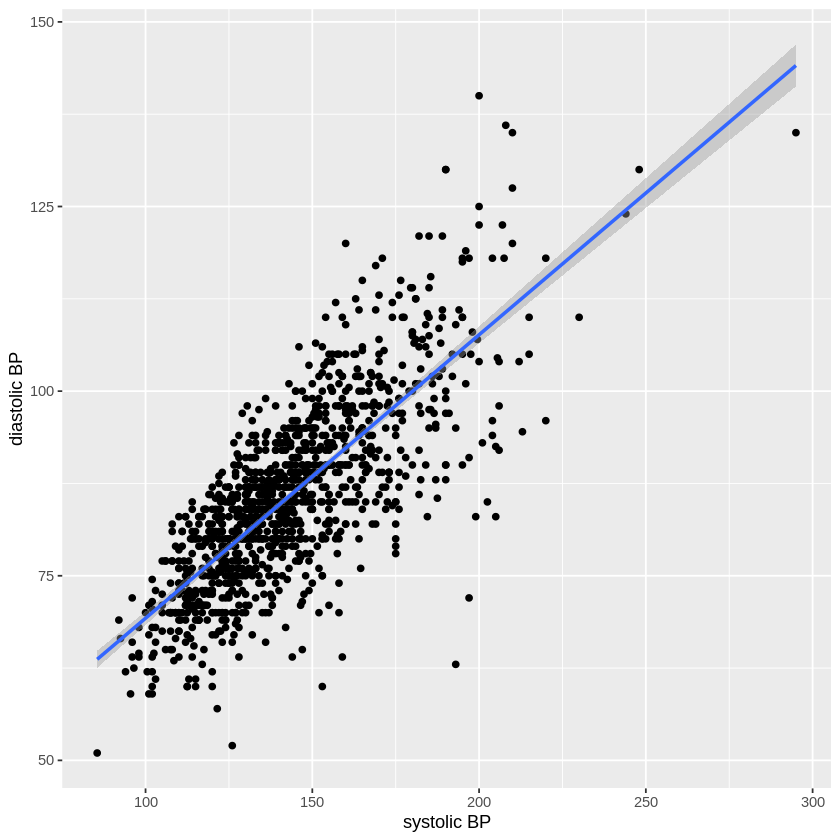

In [17]:
# and for females
p = ggplot(framingham_data_female_older, aes(x=sysBP, y=diaBP)) +
    geom_point() +  
    geom_smooth(method=lm,level = 0.95)   # Add linear regression line, by default includes 95% confidence region
p+xlab('systolic BP')+ylab('diastolic BP')

# Save your notebook!